### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [269]:
data = pd.read_csv('data/coupons.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [270]:
#This part is used to investigate the data property
data["car"].value_counts()
data["Restaurant20To50"].value_counts()
data["CoffeeHouse"].value_counts()
data["Bar"].value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [271]:
data["CarryAway"].value_counts()

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [272]:
#filter out the nan data
data["car"] = data["car"].fillna("unknown")
# convert the string in 'age' to number and use 55 to replace 50 plus, 20 to replace below20
data["age"] = pd.to_numeric(data["age"].str.replace("50plus", "55").str.replace("below21", "20"), downcast="integer")



4. What proportion of the total observations chose to accept the coupon? 



In [273]:
data.query("Y == 1").shape[0]/data.shape[0]

0.5684326710816777

### The general acceptance portion is around 0.57

5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

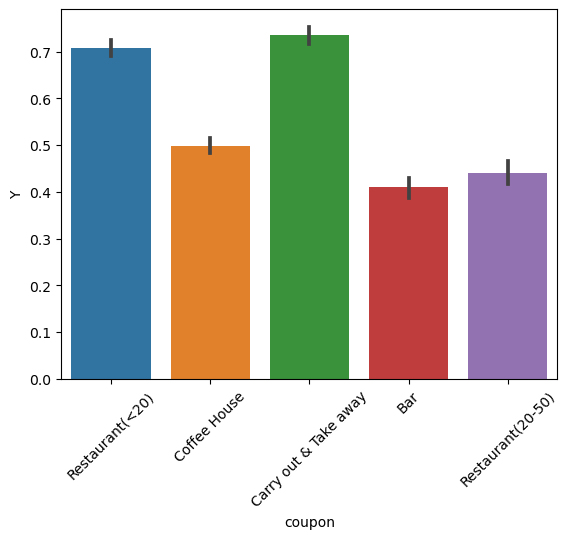

In [274]:
# display the coupon portion in all the dataset
data["coupon"].value_counts()
sns.barplot(data, x = "coupon", y = 'Y')
plt.xticks(rotation = 45)

6. Use a histogram to visualize the temperature column.

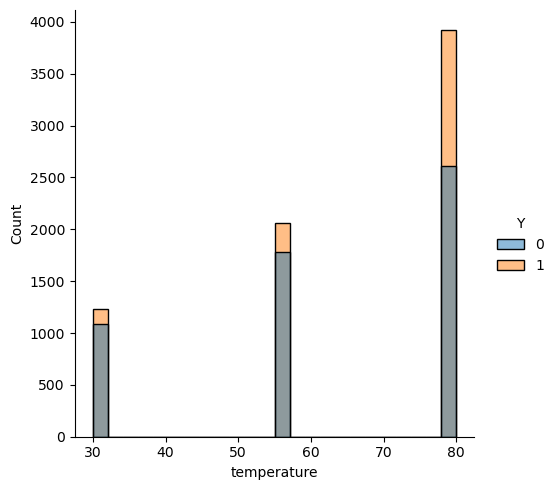

In [275]:
sns.displot(data, x = "temperature", hue = "Y")

In [276]:
px.histogram(data.query("Y ==1"), x = "occupation", color = "occupation")


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '$37500 - $49999'),
  Text(1, 0, '$62500 - $74999'),
  Text(2, 0, '$12500 - $24999'),
  Text(3, 0, '$75000 - $87499'),
  Text(4, 0, '$50000 - $62499'),
  Text(5, 0, '$25000 - $37499'),
  Text(6, 0, '$100000 or More'),
  Text(7, 0, '$87500 - $99999'),
  Text(8, 0, 'Less than $12500')])

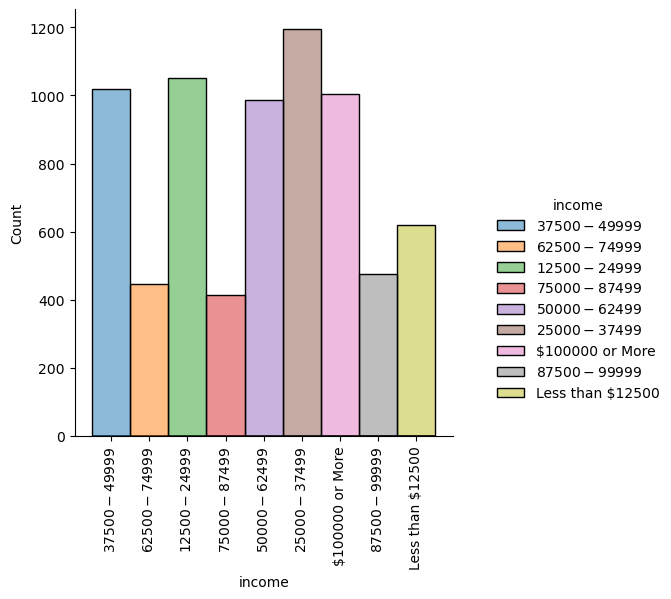

In [277]:
sns.displot(data.query("Y ==1"), x = "income", hue = "income")
plt.xticks(rotation =  90)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [278]:
# get the Bar coupon session in data
DataFrame = data.query("coupon == 'Bar'")


2. What proportion of bar coupons were accepted?


In [279]:
# calculate the accepted proportion
DataFrame.query("Y == 1").shape[0]/DataFrame.shape[0]

0.41001487357461575

### bar coupons acceptance rate is around 0.41

In [280]:
#plot the count of "bar" coupon accepted vs non-accepted
px.histogram(DataFrame, x = "Y", color = "Y")

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [281]:
DataFrame["Bar"].value_counts() # invetigation the struction of the data["Bar"]

never    830
less1    570
1~3      397
4~8      150
gt8       49
Name: Bar, dtype: int64

In [282]:
# calculate the total number of the people went to bar 3 or fewer
totalnumber = DataFrame.query("Bar == 'never'or Bar == 'less1' or Bar == '1~3'").shape[0]
#calcultate the acceptence rate in the people go to bar 3 or fewer
rate3fewer = DataFrame.query("Y == 1").query("Bar == 'never'or Bar == 'less1' or Bar == '1~3'").shape[0]/totalnumber
#display the result
rate3fewer


0.37061769616026713

In [283]:
# calculate the total number of people went to bar more than 3 times
totalnumber =  DataFrame.query("Bar == '4~8' or Bar == 'gt8'").shape[0]
# calculate the acceptance rate in the people went to bar more than 3 time3
rateMore = DataFrame.query("Y == 1").query("Bar == '4~8' or Bar == 'gt8'").shape[0]/totalnumber
#display the result
rateMore

0.7688442211055276

In [284]:
#histogram plot the data with "coupon == Bar" to show the portion vs "Bar" and colored by "Y"
px.histogram(DataFrame, x = "Bar", color = "Y")

### people go to bar more than 3 times a month have higher accpetance rate in bar coupon. 0.76 vs 0.37

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [285]:
# data of go to bar more than once a month
FrameMoreThanOnce = DataFrame[DataFrame["Bar"].notnull()].query("Bar != 'never' and Bar != 'less1'")
# calculate the acceptance rate in these session of people
rateMorethanOnce = FrameMoreThanOnce.query("Y == 1").shape[0] / FrameMoreThanOnce.shape[0]
#display result
rateMorethanOnce

0.6879194630872483

In [286]:
#data of people over age 25
FrameOver25 = DataFrame[DataFrame["age"].notnull()].query("age > 25")
#calculate the acceptance rate of these session of people
rateLarge25 = FrameOver25.query("Y == 1").shape[0]/FrameOver25.shape[0]
#display result
rateLarge25

0.38334434897554526

In [287]:
#data of people over age 25
Both = FrameMoreThanOnce[FrameMoreThanOnce["age"].notnull()].query("age > 25")
#calculate the acceptance rate of these session of people
rateBoth = Both.query("Y == 1").shape[0]/Both.shape[0]
#display result
rateBoth

0.6952380952380952

### People go to bar more than once a month has higher acceptance rate than people over the age of 25. 0.68 vs 0.38 
### People who go to bar more than once and age is over 25 have the highest acceptance rate. 0.70


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [288]:
# passengers not a kid
FrameNotKid = DataFrame.query("passanger != 'Kid(s)'")
rateNotKids = FrameNotKid.query("Y == 1").shape[0]/FrameNotKid.shape[0]
rateNotKids

0.43290999447818884

In [289]:
# occupations other than farming, fishing or forestry
OccuData = DataFrame.query("occupation != 'farming' or occupation != 'fishing' or occupation != 'forestry'")
rateOccu = OccuData.query("Y ==1").shape[0] / OccuData.shape[0]
rateOccu

0.41001487357461575

In [290]:
# plot the analyze data
res = [['3OrFewer', rate3fewer], ['MoreThan3', rateMore], ['MoreThanOnce', rateMorethanOnce],['Over25', rateLarge25],['PassangerNoKid',rateNotKids], ['selectedOccu', rateOccu]]
df = pd.DataFrame(res, columns=['Name', 'rate'])
px.line(df, x = "Name", y = "rate")

###  Compared with the other two groups, peole goes to bar more than once a month have high acceptance rate.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [291]:
# data who go to bars more than once and had passengers not a kid and were not widowed
data1 = FrameMoreThanOnce.query("passanger != 'kid(s)' and maritalStatus != 'Widowed'")
# calculate the acceptance rate
r1 = data1.query("Y == 1").shape[0]/data1.shape[0]
# show result
r1

0.6879194630872483

In [292]:
# data who go to bars more than once and ages are under 30
data2 = FrameMoreThanOnce.query("age < 30")
r2 = data2.query("Y == 1").shape[0]/data2.shape[0]
r2

0.7217391304347827

In [293]:
#data who go to cheap restanrants more than 4 times a month and income is less than 50K
data3 = DataFrame.query("RestaurantLessThan20 == '4~8' or RestaurantLessThan20 == 'gt8'").query("income == '$25000 - $37499' or income == '$12500 - $24999' or income == '$37500 - $49999' or income == 'Less than $12500'")
r3 = data3.query("Y == 1").shape[0] / data3.shape[0]
r3

0.45348837209302323

#### go to bars more than once a month, had passengers that were not a kid, and were not widowed.  Rtae is 0.69
#### go to bars more than once a month and are under the age of 30. Rate is 0.72.
#### go to cheap restaurants more than 4 times a month and income is less than 50K.    Rate is 0.45

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### First, the frequency to go to bar in one month is a critical factor to effect whether they accept the coupon or not. Besides, age, income, marriage status and whether they have kids when drive will also affect their decisions.
### Based on the pre-setup quesitons above, we can have a conclusion is that  people who go to bar more than once a month and age is under 30, with no kids accompany, is approaching to accept the "Bar coupon".

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# Use coffee house data as another example

In [294]:
#coffee house coupon only query the data with "coffee house" coupon
DataFrame = data.query("coupon == 'Coffee House'")

2. What proportion of coffee house coupons were accepted?

In [295]:
#calculate the acceptance rate of "coffee house" coupon
DataFrame.query("Y == 1").shape[0] / DataFrame.shape[0]


0.49924924924924924

In [296]:
#plot the data
px.histogram(DataFrame, x = "Y", color = "Y")

### In general, the 'coffee house' coupon's acceptance rate is around 0.499

3. Compare the acceptance rate between those who went to a coffee house 3 or fewer times a month, but never, to those who went more.

In [297]:
#investigate the data distribution of "CoffeeHoust". How often they visit the coffee house
DataFrame["CoffeeHouse"].value_counts()


less1    1075
1~3      1042
never     927
4~8       538
gt8       342
Name: CoffeeHouse, dtype: int64

In [298]:
#people who neve go to coffeeHouse
data0 = DataFrame.query("CoffeeHouse == 'never'")
#calculate the acceptance rate
rate3fewer = data0.query("Y == 1").shape[0]/data0.shape[0]
rate3fewer

0.18878101402373246

In [303]:
#people who go to a coffee house 3 or fewer times
data1 = DataFrame[DataFrame["CoffeeHouse"].notnull()].query("CoffeeHouse == 'less1' or CoffeeHouse == '1~3'")
rate3fewer = data1.query("Y == 1").shape[0]/data1.shape[0]
rate3fewer

0.5635333018422296

In [304]:
#people who go to a coffee house more than 3 times
data2 =  DataFrame.query("CoffeeHouse == '4~8' or CoffeeHouse == 'gt8'")
rateMore = data2.query("Y == 1").shape[0]/data2.shape[0]
rateMore

0.675

In [305]:
px.histogram(DataFrame, x = "CoffeeHouse", color = "Y")

### People who go to coffeehouse fewer than 3 times have higher acceptance rate. 0.68


4. Compare the acceptance rate between drivers who go to a CoffeeHouse more than once a month and are over the age of 25 to the all others.  Is there a difference?

In [306]:
# go to CoffeeHouse more than once a month
FrameMoreThanOnce = DataFrame[DataFrame["CoffeeHouse"].notnull()].query("CoffeeHouse != 'never' and CoffeeHouse != 'less1'")
rateMorethanOnce = FrameMoreThanOnce.query("Y == 1").shape[0] / FrameMoreThanOnce.shape[0]
rateMorethanOnce

0.6602497398543185

In [319]:
#over age 25
FrameOver25 = DataFrame[DataFrame["age"].notnull()].query("age >25")
rateLarge25 = FrameOver25.query("Y == 1").shape[0]/FrameOver25.shape[0]
rateLarge25


0.48140635564570655

In [320]:
# plot the accepte distribution along 'age'
px.histogram(DataFrame[DataFrame["age"].notnull()], x = "age", color = "Y")

### People who go to a coffeeHouse more than once a month have higher acceptance rate is around 0.66. 

5. Use the same process to compare the acceptance rate between drivers who go to coffee house more than once a month and had passengers with 'Friends' and had occupations are 'Student' and 'Computer & Mathmatic'. 


In [322]:
# passengers is friends
FrameFriends = DataFrame.query("passanger == 'Friend(s)'")
rateFriends = FrameNotKid.query("Y == 1").shape[0]/FrameNotKid.shape[0]
rateFriends

0.5969055374592834

In [323]:
# coffe coupon distribution along 'passanger'
px.histogram(DataFrame[DataFrame["passanger"].notnull()], x = "passanger", color = "Y")

In [324]:
#Coffee coupon data distribution along 'occupation'
px.histogram(DataFrame[DataFrame["occupation"].notnull()], x = "occupation", color = "Y")
    

In [325]:
# occupations are Unemployed, Student, Computer& Mathematical
OccuData = DataFrame.query("occupation == 'Unemployed' or occupation == 'Student' or occupation == 'Computer&Mathematical'")
rateOccu = OccuData.query("Y ==1").shape[0] / OccuData.shape[0]
rateOccu

0.5809167446211413

###  People who go to CoffeeHouse more than once a month have higher rate. Considering the occupation and passengers, people with friends and with occupations, as 'Student' and 'Computer & Mathematical', are likely more to accpet the coupon.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers were friends, and were not widowed *OR*
- go to bars more than once a month and are under the age of 25 *OR*
- go to restaurants 20 ~50 more than 4 times a month and income is less than 50K. 



In [261]:
px.histogram(DataFrame[DataFrame["maritalStatus"].notnull()], x = "maritalStatus", color = "Y")

In [262]:
data1 = FrameMoreThanOnce.query("passanger == 'Friend(s)' and maritalStatus != 'Widowed'")
r1 = data1.query("Y == 1").shape[0]/data1.shape[0]
r1

0.7632450331125827

In [263]:
data2 = FrameMoreThanOnce.query("age < 25")
r2 = data2.query("Y == 1").shape[0]/data2.shape[0]
r2

0.7127659574468085

In [264]:
px.histogram(FrameMoreThanOnce[FrameMoreThanOnce["age"].notnull()], x = "age", color = "Y")

In [265]:
data3 = DataFrame.query("Restaurant20To50 == '4~8' or Restaurant20To50 == 'gt8'").query("income == '$25000 - $37499' or income == '$12500 - $24999' or income == '$37500 - $49999' or income == 'Less than $12500'")
r3 = data3.query("Y == 1").shape[0] / data3.shape[0]
r3

0.6870229007633588

#### go to bars more than once a month, had passengers were friends, and were not widowed. Rate is 0.76.
#### go to bars more than once a month and are under the age under 25. Rate is 0.71
#### go to cheap restaurants 20 ~ 50 more than 4 times a month and income is less than 50K. Rate is 0.68

## The acceptance of "Coffee coupon" are affected a lot by people's life style, for example, how often they go to coffee house, how much they are willing to spend on restaurant. They also varies based on occupation and income.
## Based on previous results, it shows that people used to go to coffee house more than once a month, under 25 and go to restaurant20To50 more than 3 times a month is more likely to accept the coupon. Besides, people with occupation as 'Student' and 'Computer & Mathematical' are more likely to accept coupon. In addition, when the driver is with friends, are more likely to accept the coupon.